In [1]:
# Perform Classification then Regression

In [2]:
# Import all necessary libs

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
sb.set() 

#Set format for float to be $ because selected columns are currency
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
## import excel into dataframe

mdata = pd.read_excel('MovieDataset.xlsx')
#mdata['budget_adj'] = pd.Series(["${0:.2f}".format(val) for val in mdata['budget_adj']])
#mdata['revenue_adj'] = pd.Series(["${0:.2f}".format(val) for val in mdata['revenue_adj']])
mdata['is_remake'] = mdata['is_remake'].str.upper() # format categorical value into upper case
mdata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_remake,inflation_rate,year_difference
0,23437,tt1179056,1.07,35000000,115664037,A Nightmare on Elm Street,Jackie Earle Haley|Katie Cassidy|Kyle Gallner|...,http://www.nightmareonelmstreet.com/,Samuel Bayer,Never Sleep Again.,...,New Line Cinema|Platinum Dunes,4/30/10,423,5.50,2010,"35,000,000.00","115,664,037.00",Y,nan,nan
1,377,tt0087800,1.33,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",...,New Line Cinema|Smart Egg Pictures,11/15/84,625,7.10,1984,"3,778,275.67","53,535,044.98",Y,nan,nan
2,1965,tt0120787,1.04,60000000,128038368,A Perfect Murder,Michael Douglas|Gwyneth Paltrow|Viggo Mortense...,NaN,Andrew Davis,A powerful husband. An unfaithful wife. A jeal...,...,Kopelson Entertainment|Warner Bros.,6/4/98,158,6.30,1998,"80,261,728.14","171,276,344.74",Y,nan,34.00
3,14644,tt0423877,0.09,0,0,Boudu,GÃ©rard Depardieu|Catherine Frot|GÃ©rard Jugno...,NaN,GÃ©rard Jugnot,NaN,...,Novo Arturo Films|DD Productions|TF1 Films Pro...,3/9/05,14,5.00,2005,0.00,0.00,Y,nan,19.00
4,1058,tt0085276,0.66,0,19910002,Breathless,Richard Gere|ValÃ©rie Kaprisky|Art Metrano|Joh...,NaN,Jim McBride,He's the last man on earth any woman needs - b...,...,Orion Pictures|Breathless Associates|Miko Prod...,5/13/83,32,5.80,1983,0.00,"43,589,206.25",Y,nan,23.00


In [4]:
    print("Data type : ", type(mdata))
print("Data dims : ", mdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10866, 24)


In [5]:
# filter to selection columns only to avoid noises from other columns

cols = ['popularity', 'original_title', 'release_year','budget_adj','revenue_adj', 'is_remake']
movie_cleaner_cols = mdata[cols]
movie_cleaner_cols.head()

,popularity,original_title,release_year,budget_adj,revenue_adj,is_remake
0,1.07,A Nightmare on Elm Street,2010,"35,000,000.00","115,664,037.00",Y
1,1.33,A Nightmare on Elm Street,1984,"3,778,275.67","53,535,044.98",Y
2,1.04,A Perfect Murder,1998,"80,261,728.14","171,276,344.74",Y
3,0.09,Boudu,2005,0.00,0.00,Y
4,0.66,Breathless,1983,0.00,"43,589,206.25",Y


In [6]:
#movie_cleaner_cols.info()

Ratio of the classes Y : N = 360 : 10506


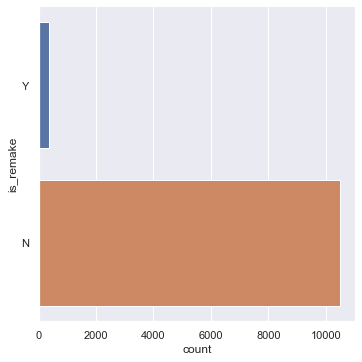

In [7]:
# extract column for classification

is_remake = pd.DataFrame(movie_cleaner_cols['is_remake'])  # Response
revenue_adj = pd.DataFrame(movie_cleaner_cols['revenue_adj'])      # Predictor
distIR = is_remake["is_remake"].value_counts()
sb.catplot(y = "is_remake", data = is_remake, kind = "count")
print(f"Ratio of the classes Y : N = {distIR.loc['Y']} : {distIR.loc['N']}")

In [8]:
#irra = pd.concat([is_remake,revenue_adj], axis=1)
#f, axes = plt.subplots(1, 2, figsize=(12, 4))
#sb.boxplot(x="revenue_adj", y = "is_remake", data = irra, orient='h', ax = axes[0])
#sb.swarmplot(x="revenue_adj", y = "is_remake", data = irra, orient = "h")

In [9]:
# Prepare train and test data

rev_train, rev_test, rm_train, rm_test = train_test_split(revenue_adj, is_remake, test_size = 0.25)
print(f"Train Set : revenue_adj: {rev_train.shape}, is_remake: {rm_train.shape}")
print(f"Test Set : revenue_adj: {rev_test.shape} , is_remake: {rm_test.shape}")

Train Set : revenue_adj: (8149, 1), is_remake: (8149, 1)
Test Set : revenue_adj: (2717, 1) , is_remake: (2717, 1)


In [10]:
# Create decision tree classifier and train it

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(rev_train, rm_train)    
rm_train_pred = dectree.predict(rev_train)
rm_test_pred = dectree.predict(rev_test)

In [11]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(rev_train, rm_train))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9680942446926003



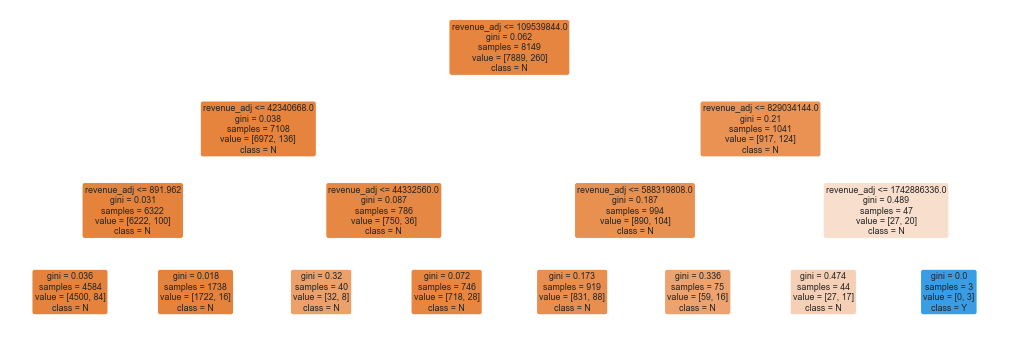

In [12]:
# Plot the trained decision tree

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(rev_train, rm_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(18,6))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["revenue_adj"], 
          class_names=["N","Y"])

rm_train_pred = dectree.predict(rev_train)

<AxesSubplot:>

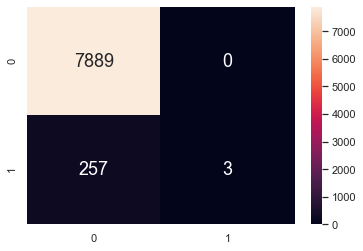

In [13]:
# Plot the Confusion Matrix for Train and Test train

sb.heatmap(confusion_matrix(rm_train, rm_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [14]:
# Get TPR/TNR, FPR/FNR & classification accuracy of train data

cm = confusion_matrix(rm_train, rm_train_pred)
train_tn = cm[0][0]
train_fp = cm[0][1]
train_fn = cm[1][0]
train_tp = cm[1][1]

def get_TrueRates(TP,TN,FP,FN):
    return TP/(TP+FN), TN/(TN+FP) # TPR, TNR
def get_FalseRates(TP,TN,FP,FN):
    return FP/(TN+FP), FN/(FN+TP) # FPR, FNR
def get_ClassificationAccuracy(TP,TN,FP,FN):
    return (TP+TN)/(TP+FP+FN+TN)

train_tpr, train_tnr = get_TrueRates(train_tp,train_tn,train_fp,train_fn)
train_fpr, train_fnr = get_FalseRates(train_tp,train_tn,train_fp,train_fn)
train_acc = get_ClassificationAccuracy(train_tp,train_tn,train_fp,train_fn)
print(f"True Positive Rate:\t\t{train_tpr}")
print(f"True Negative Rate:\t\t{train_tnr}")
print(f"False Positive Rate:\t\t{train_fpr}")
print(f"False Negative Rate:\t\t{train_fnr}")

print(f"Classification Accuracy:\t{train_acc}")

True Positive Rate:		0.011538461538461539
True Negative Rate:		1.0
False Positive Rate:		0.0
False Negative Rate:		0.9884615384615385
Classification Accuracy:	0.9684623880230703


<AxesSubplot:>

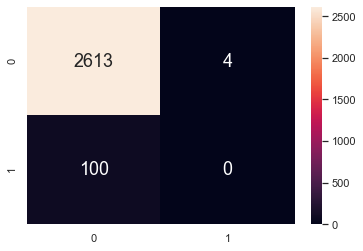

In [15]:
# Plot the Confusion Matrix for Train and Test train

rm_test_pred = dectree.predict(rev_test)
sb.heatmap(confusion_matrix(rm_test, rm_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [16]:
# Get TPR/TNR, FPR/FNR & classification accuracy of train data

cm = confusion_matrix(rm_test, rm_test_pred)
test_tn = cm[0][0]
test_fp = cm[0][1]
test_fn = cm[1][0]
test_tp = cm[1][1]

test_tpr, test_tnr = get_TrueRates(test_tp,test_tn,test_fp,test_fn)
test_fpr, test_fnr = get_FalseRates(test_tp,test_tn,test_fp,test_fn)
test_acc = get_ClassificationAccuracy(test_tp,test_tn,test_fp,test_fn)
print(f"True Positive Rate:\t\t{test_tpr}")
print(f"True Negative Rate:\t\t{test_tnr}")
print(f"False Positive Rate:\t\t{test_fpr}")
print(f"False Negative Rate:\t\t{test_fnr}")

print(f"Classification Accuracy:\t{test_acc}")

True Positive Rate:		0.0
True Negative Rate:		0.9984715322888804
False Positive Rate:		0.0015284677111196026
False Negative Rate:		1.0
Classification Accuracy:	0.9617224880382775


### Best model for prediction would be with TPR and TNR is high while FPR and FNR is low. Hence is_remake is not a good option for prediction, but still we will regress it with another column popularity to come out with the revenue to check if they make any difference

In [17]:
## With popularity and is_remake

In [18]:
# Format categorical data into 0 and 1 to perform linear regression

movie_cleaner_cols['is_remake'] = movie_cleaner_cols['is_remake'].astype('category')
movie_cleaner_cols['is_remake'] = movie_cleaner_cols['is_remake'].cat.reorder_categories(['Y', 'N'], ordered=True)
movie_cleaner_cols['is_remake'] = movie_cleaner_cols['is_remake'].cat.codes
print(movie_cleaner_cols['is_remake'])

0        0
1        0
2        0
3        0
4        0
        ..
10861    1
10862    1
10863    1
10864    1
10865    1
Name: is_remake, Length: 10866, dtype: int8


<ipython-input-18-09577e13b65c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaner_cols['is_remake'] = movie_cleaner_cols['is_remake'].astype('category')
<ipython-input-18-09577e13b65c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaner_cols['is_remake'] = movie_cleaner_cols['is_remake'].cat.reorder_categories(['Y', 'N'], ordered=True)
<ipython-input-18-09577e13b65c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [19]:
# reset train and test data for linear regression
predictors =  ["is_remake", "popularity"]
revenue_adj = pd.DataFrame(movie_cleaner_cols["revenue_adj"])  # Response
is_remake = pd.DataFrame(movie_cleaner_cols[predictors])      # Predictor
rev_train, rev_test, rm_train, rm_test = train_test_split(revenue_adj, is_remake, test_size = 0.25)

In [20]:
linreg = LinearRegression()
linreg.fit(rm_train, rev_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [94370945.2936202]
Coefficients 	: a =  [[-1.00741026e+08  8.25935741e+07]]


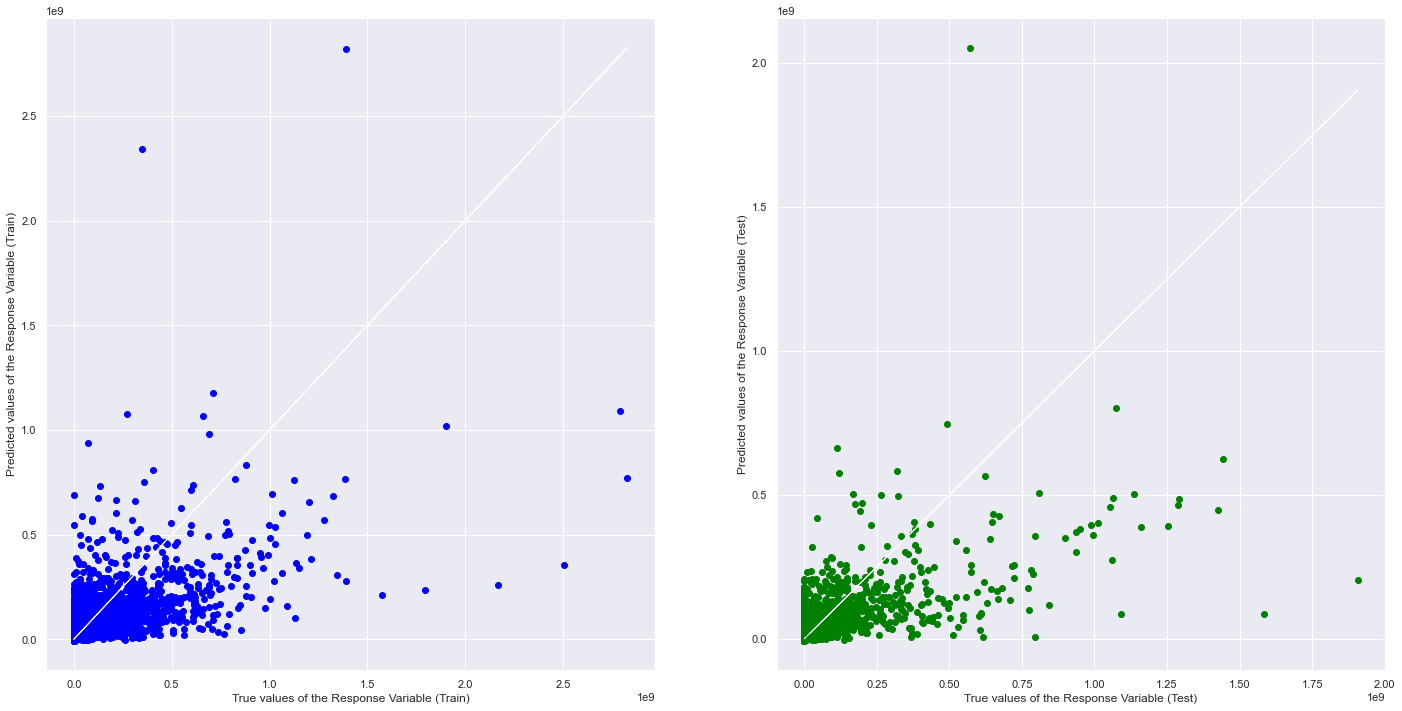

In [21]:
rev_train_pred = linreg.predict(rm_train)
rev_test_pred = linreg.predict(rm_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(rev_train, rev_train_pred, color = "blue")
axes[0].plot(rev_train, rev_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(rev_test, rev_test_pred, color = "green")
axes[1].plot(rev_test, rev_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [22]:
movie_pred = movie_cleaner_cols[movie_cleaner_cols["original_title"].isin(["Titanic", "Inception", "Toy Story 2", "Death Race", "The Omen"])]
movie_pred

,popularity,original_title,release_year,budget_adj,revenue_adj,is_remake
26,1.58,Death Race,2008,"45,575,398.52","74,705,690.28",0
287,0.73,The Omen,2006,"27,041,728.96","128,922,344.92",0
334,1.81,Toy Story 2,1999,"117,814,756.19","634,910,500.71",0
4549,9.36,Inception,2010,"160,000,000.00","825,500,000.00",1
9350,1.00,The Omen,1976,"10,728,754.48","233,438,462.35",1
10051,4.36,Titanic,1997,"271,692,064.21","2,506,405,735.42",1
10052,0.22,Titanic,1996,"18,072,817.61",0.00,1


In [23]:

X_pred = pd.DataFrame(movie_pred[predictors])

In [24]:
y_pred = linreg.predict(X_pred)
y_pred

array([[2.25123098e+08],
       [1.54478584e+08],
       [2.43881585e+08],
       [7.67006662e+08],
       [7.61750111e+07],
       [3.53343023e+08],
       [1.17479762e+07]])

In [25]:
y_pred = pd.DataFrame(y_pred, columns = ["pred_revenue"], index = movie_pred.index)
movie_predcheck = pd.concat([movie_pred[["original_title", "popularity", "is_remake", "revenue_adj"]], y_pred], axis = 1)
movie_predcheck

,original_title,popularity,is_remake,revenue_adj,pred_revenue
26,Death Race,1.58,0,"74,705,690.28","225,123,098.06"
287,The Omen,0.73,0,"128,922,344.92","154,478,584.06"
334,Toy Story 2,1.81,0,"634,910,500.71","243,881,585.43"
4549,Inception,9.36,1,"825,500,000.00","767,006,661.73"
9350,The Omen,1.00,1,"233,438,462.35","76,175,011.07"
10051,Titanic,4.36,1,"2,506,405,735.42","353,343,022.74"
10052,Titanic,0.22,1,0.00,"11,747,976.15"


In [26]:
## Just is_remake

Intercept 	: b =  [2.47693166e+08]
Coefficients 	: a =  [[-2.02026971e+08]]


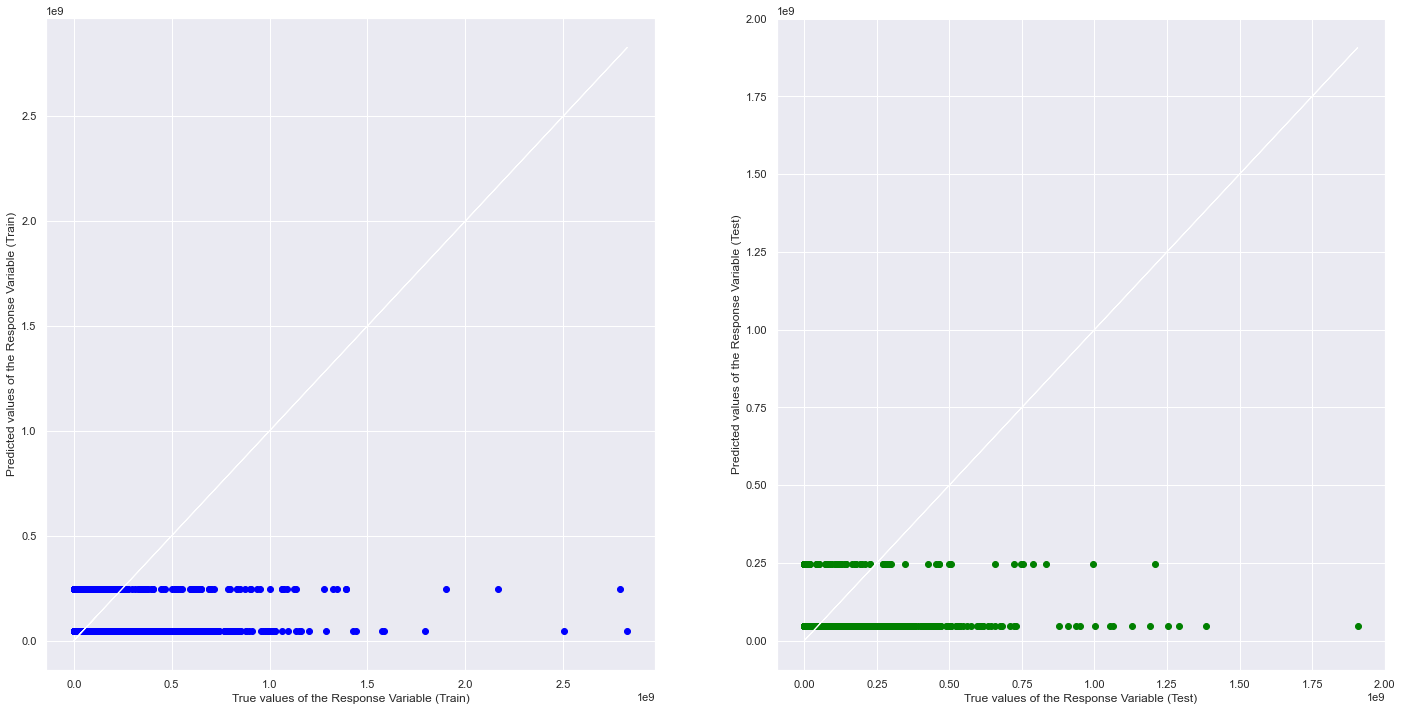

,original_title,is_remake,revenue_adj,pred_revenue
17,Cinderella,0,"498,963,025.22","247,693,165.80"
2219,Cinderella,1,0.00,"45,666,195.00"
4549,Inception,1,"825,500,000.00","45,666,195.00"
10051,Titanic,1,"2,506,405,735.42","45,666,195.00"
10052,Titanic,1,0.00,"45,666,195.00"


In [27]:
# reset train and test data for linear regression
predictors =  ["is_remake"]
revenue_adj = pd.DataFrame(movie_cleaner_cols["revenue_adj"])  # Response
is_remake = pd.DataFrame(movie_cleaner_cols[predictors])      # Predictor
rev_train, rev_test, rm_train, rm_test = train_test_split(revenue_adj, is_remake, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(rm_train, rev_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

rev_train_pred = linreg.predict(rm_train)
rev_test_pred = linreg.predict(rm_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(rev_train, rev_train_pred, color = "blue")
axes[0].plot(rev_train, rev_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(rev_test, rev_test_pred, color = "green")
axes[1].plot(rev_test, rev_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

movie_pred = movie_cleaner_cols[movie_cleaner_cols["original_title"].isin(["Titanic", "Inception", "Cinderella"])]
movie_pred

X_pred = pd.DataFrame(movie_pred[predictors])
y_pred = linreg.predict(X_pred)
y_pred

y_pred = pd.DataFrame(y_pred, columns = ["pred_revenue"], index = movie_pred.index)
movie_predcheck = pd.concat([movie_pred[["original_title", "is_remake", "revenue_adj"]], y_pred], axis = 1)
movie_predcheck

In [28]:
# take note is remake 0 is a remake while 1 is not a remake